In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn')
np.random.seed(42)

# Linear Regression

Recall that a linear regression model is as follows
$$ \hat{y} = h_{\boldsymbol\theta}(\textbf{x}) = \boldsymbol\theta \cdot \textbf{x}$$
Where 
* $\boldsymbol\theta$ is a *parameter vector* (with bias $\theta_0$ and feature weights $\theta_1$ to $\theta_n$)
* $\textbf{x}$ is the *feature vector*
* $h_\theta$ is the *hypothesis function* using model parameters $\theta$

And that the most common form of evaluating this model's performance the RMSE. Thus to train a linear regression we need to find values of $\boldsymbol\theta$ that minimises the RMSE. Since the square root function is increasing and differentiable on it's domain, minimising the RMSE is the same as minimising the Mean Square Error (MSE), which is easier to do.

The MSE cost function for a linear regression model is
$$ \text{MSE}(\textbf{X},h_\boldsymbol\theta) = \frac{1}{m}\sum_{i=1}^{m}\big(\boldsymbol\theta^\intercal \textbf{x}^{(i)} - y^{(i)} \big)^2 $$

## The Normal Equation


This function has a closed-form solution which is called the **normal equation**
$$ \hat{\boldsymbol\theta} = \big(\textbf{X}^\intercal \textbf{X}\big)^{-1}\textbf{X}^\intercal \textbf{y} $$
Where 
* $\hat{\boldsymbol\theta}$ is the value of $\boldsymbol\theta$ that minimizes the cost function
* $\textbf{y}$ is the vector of target values

We'll generate some linear looking data to test this function

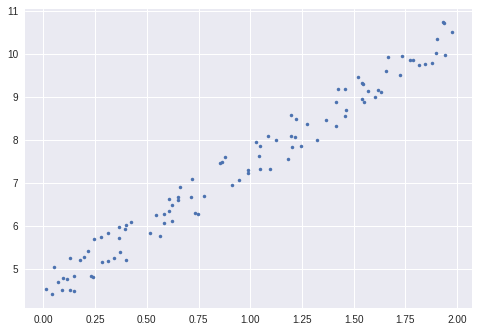

In [5]:
X = 2*np.random.rand(100,1)
y = 4 + 3*X + np.random.rand(100,1)

plt.plot(X, y, '.')
plt.show()

In [6]:
X_b = np.c_[np.ones((100,1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

From above, the function we wanted to generate was $y=4+3x_1+noise$ and here are the results of $\hat{\boldsymbol\theta}$

In [7]:
theta_best

array([[4.51359766],
       [2.98323418]])

Now we can use $\hat{\boldsymbol\theta}$ to make predictions

In [8]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.51359766],
       [10.48006601]])

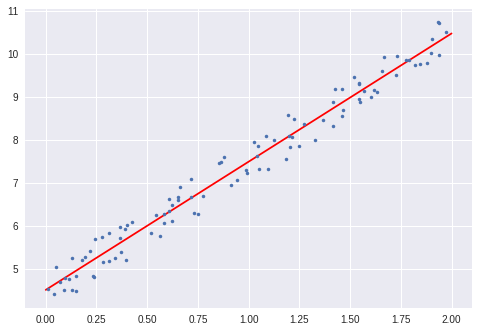

In [9]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, '.')
plt.show()

We can do the same with Scikit-Learn. The LinearRegression class is based on the scipy.linalg.lstsq() function

In [10]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print("Bias: ", lin_reg.intercept_, "feat. weights:", lin_reg.coef_)
print(lin_reg.predict(X_new))

Bias:  [4.51359766] feat. weights: [[2.98323418]]
[[ 4.51359766]
 [10.48006601]]


*Note:* This function computes $\hat{\boldsymbol\theta} = \textbf{X}^{+}\textbf{y}$ where $\textbf{X}^{+}$ is the *pseudoinverse* of $\textbf{X}$. This approach is more efficient than solving the normal equation and can deal with edge cases, for example, when the matrix $\textbf{X}^\intercal \textbf{X}$ is not invertible

#### Computational Complexity

The approach of solving the Normal Equation computes the inverse of $\textbf{X}^\intercal \textbf{X}$. The complexity of inverting a matrix is about $O(n^{2.4})$ to $O(n^3)$ depending on the implementation. The pseudoinverse approach is about $O(n^2)$.

Both of these approached get very slow once you have a very large number of features (e.g. 100,000) but on the positive side, they are both linear with regard to the number of instances in the training set, so they handle large training sets efficiently.

## Gradient Descent

Gradient descent involves iteratively changing parameters to minimize a cost function. 

First, recall that for Linear Regression we are interested in minimizing the MSE
$$ \text{MSE}(\boldsymbol\theta) = \frac{1}{m}\sum_{i=1}^{m}\big(\boldsymbol\theta^\intercal \textbf{x}^{(i)} - y^{(i)} \big)^2 $$

And that the gradient of the MSE w.r.t. $\boldsymbol\theta$ can be written as 
$$ \nabla_{\boldsymbol\theta}\text{MSE}(\boldsymbol\theta) = \frac{2}{m}\textbf{X}^\intercal(\textbf{X}\boldsymbol\theta - \textbf{y}) $$

Given a starting set of parameters $\boldsymbol\theta$ and some learning rate $\eta$, we update $\boldsymbol\theta$ the MSE by subtracting the gradient of the MSE from the current value of $\boldsymbol\theta$

$$ \boldsymbol\theta^{(\text{next step})} = \boldsymbol\theta - \eta\nabla_{\boldsymbol\theta}\text{MSE}(\boldsymbol\theta) $$

The negative gradient will give use the direction in which we move and the *learning rate* gives use the size of the steps taken.

**Note:** When using Gradient Descent, ensure that all features have a similar scale, else the algorithm will take longer to converge

### Batch Gradient Descent

In batch GD, the gradient is calculated over the full training set (hence batch) at every step (update of the parameters). Thus, it is very slow on very large training sets. On the other hand, gradient descent scales well with the number of features. Training a Linear Regression model with hundreds of features is much faster with GD than solving the Normal Equation.

In [11]:
# A simple implementation of this 
def batch_gd(theta, eta=0.1, n_iterations=1000, m=100, first_n=False, n=10):
    f_n = []
    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta*gradients
        if iteration < n:
            f_n.append(theta)
    if first_n:
        return f_n
    else:
        return theta

In [12]:
theta = np.random.randn(2,1)
print(batch_gd(theta))

[[4.51359766]
 [2.98323418]]


Results are the same as solving the normal equation!

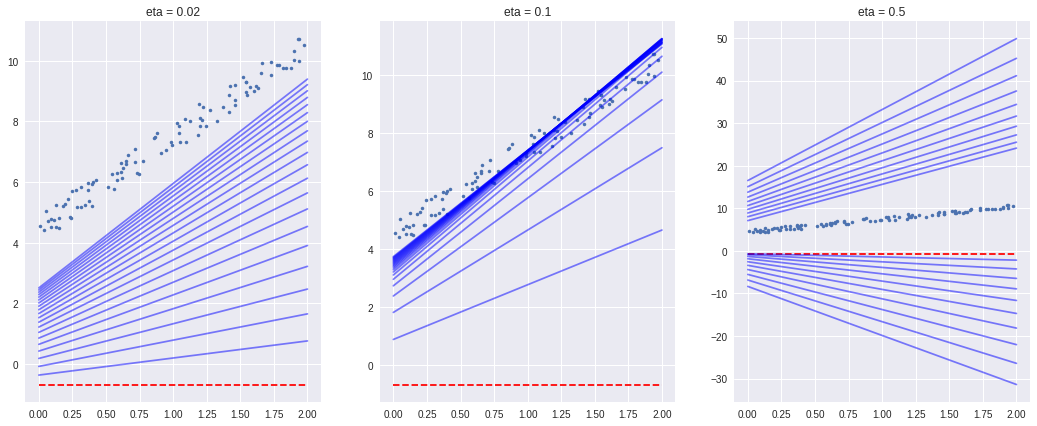

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(18, 7))
learning_rates = [0.02, 0.1, 0.5]

for ax, eta in zip(axes, learning_rates):
    ax.plot(X, y, '.')
    ax.hlines(theta[0][0], 0, 2, colors='r', linestyle='dashed')
    f_ten = batch_gd(theta, eta=eta, first_n=True, n=20)
    for pred in f_ten:
        ax.plot(X_new, X_new_b.dot(pred), 'b-', alpha=0.5)
    ax.set_title(f'eta = {eta}')

plt.show()

As seen from the plots above, it is crucial to f ind an adequate learning rate. 

* For $\eta =0.02$ the algorithm takes a long time to converge
* For $\eta =0.1$ the algorithm converges at a good rate
* For $\eta =0.5$ the algorithm overshoots the minimun and diverges

Grid Search is a good way to search for the optimal learning rate.


The number of iterations can usually be set to a large number and once we detect that the algorigthm isn't improving, we can stop. To detect improvements, we set a tolerance level $\epsilon$ such that if the norm of the gradient is less than $\epsilon$ the algorithms stops.

### Stochastic Gradient Descent

The main problem with Batch Gradient Descent is the fact that it uses the full training set to compute the gradients at every step, which makes it very slow for large training sets.

**Stochastic** Gradient Descent is at the opposite extreme, by calculating the gradient on a random instance of the training set at a time. This makes the algorithm much faster to compute, however due to it's random nature, it is much less regular than it's batch counterpart. 

Instead of gently decreasing to the minumum, it will bounce up and down decreasing only on average. Overtime it will be close to the minimum, but even when it reaches it, itkeeps bouncing around, never settling down.

It's randomness can be beneficial to escape local minima of irregular cost functions but it comes at the cost that the algorithm never settles at a minimum. One solution to this problem is to gradually reduce the learning rate, which allows the algorithm to settle at the minimum.

The function that determines the learning rate at each step is called the *learning schedule*. If the learning rate is reduced too quickly, we risk being stuck in a local minimum. If the learning rate is reduced too slowly, it may jump around the minimum for a long time and end up with a suboptimal solution if training is halted too early.

In [14]:
# A simple implementation of stochastic gradient descent
def stochastic_gd(theta, m=100 ,n_epochs=50, t0=5, t1=50, first_n=False, n=10):
    def learning_schedule(t):
        return t0 / (t + t1)
    
    f_n = []
    for epoch in range(n_epochs):
        for i in range(m):
            random_idx = np.random.randint(m)
            xi = X_b[random_idx:random_idx+1]
            yi = y[random_idx:random_idx+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            eta = learning_schedule(epoch * m + i)
            theta = theta - eta*gradients
            if i < n and epoch == 0:
                f_n.append(theta)
    if first_n:
        return f_n
    else:
        return theta

In [15]:
stochastic_gd(theta)

array([[4.51950802],
       [2.98553556]])

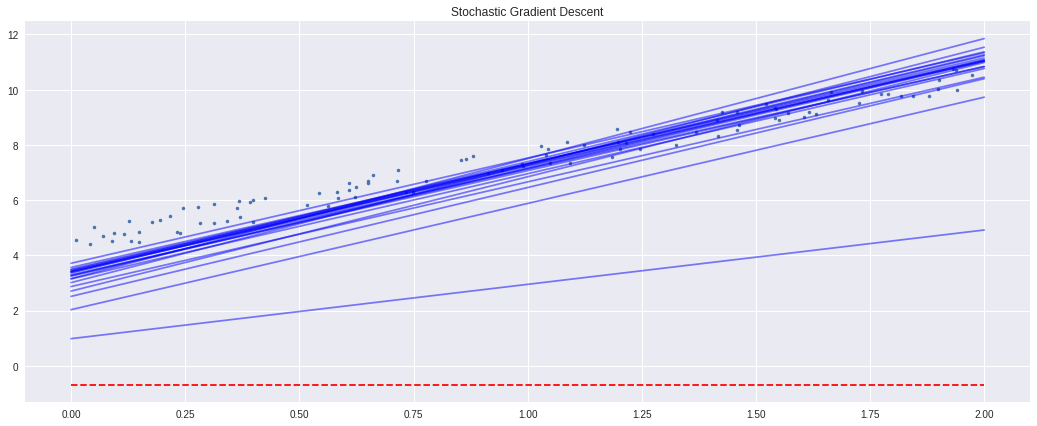

In [16]:
fig, ax = plt.subplots(figsize=(18, 7))

ax.plot(X, y, '.')
ax.hlines(theta[0][0], 0, 2, colors='r', linestyle='dashed')

f_ten = stochastic_gd(theta, first_n=True, n=20)
for pred in f_ten:
    ax.plot(X_new, X_new_b.dot(pred), 'b-', alpha=0.5)
ax.set_title(f'Stochastic Gradient Descent')

plt.show()

Note how the line bounces around

In [17]:
# Using ScikitLearn
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

print(sgd_reg.intercept_, sgd_reg.coef_)

[4.51118114] [2.99191367]


### Mini Batch Gradient Descent

Instead of relying on just one instance or the full training set, mini batch GD computes the gradient on small random sets of instances called *mini-batches*. The main advantage of mini batch over the stochastic version is the computational boost due to optimization of matrix operations. It's also less erratic than stochastic GD, especially with fairly large mini batches.

## Polynomial Regression

Linear models can also be used to fit non-linear data. One approach is to add powers of each feature as a new feature, extending the feature set.

Suppose we have features $a,b$ in our model. By using Sklearn's PolynomialFeatures, we can create new features by adding all possible combinations of multiplying $a$ and $b$ to any dregree. For example, for degree 3 we'd have the set
$$ {a, b, a^2, b^2,  a^3, b^3, ab^2, a^2b} $$

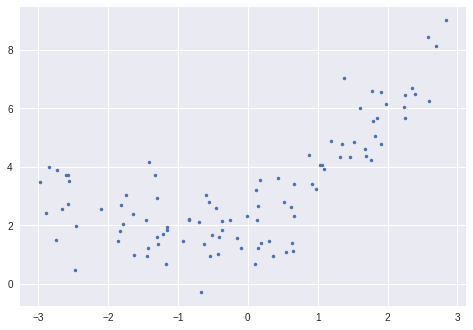

In [18]:
# Generate some non-linear data

m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

plt.plot(X,y, '.')
plt.show()

In [19]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

print(f"X[0]: {X[0]}")
print(f"X_poly[0]: {X_poly[0]}") # Original feature and it's square

X[0]: [0.12080909]
X_poly[0]: [0.12080909 0.01459484]


In [20]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

theta2, theta1 = lin_reg.coef_[0]
print(f"Predicted function: y =  ({theta2:.2f})X^2 + ({theta1:.2f})X + {lin_reg.intercept_[0]:.2f}")

Predicted function: y =  (0.93)X^2 + (0.46)X + 2.13


### Learning Curves

Note that higher degree polynomials tend to overfit the data. In previous chapter we used cross-validation testing to test a model's performance.

Another approach we can take is to look at the *learning curves:* plots of the model's performance on the training set and the validation set as a function of the training set size (or training iteration).

To generate these plots, train the model several times on different sized subsets of the training set.

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r--', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
    plt.ylabel('RMSE')
    plt.xlabel('Training Set Size')
    plt.ylim(-0.25, 3.5)
    plt.legend()
    

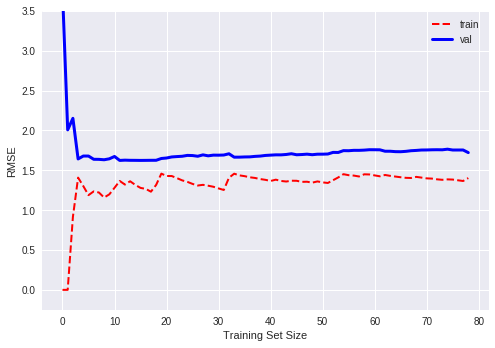

In [22]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

Let's examine the training performance first:

When there's only a couple of instances on the training set, the model fits perfectly. But as more points are added, it becomes impossible for the model to fit the data (because it is noisy and non-linear), so the error goes up and plateaus, at which point the model stops learning

On the validation set, it doesn't generalize well with few training instances. As it learns the error stabilises and plateaus. 

This is typical of underfitting the data. In this case, more training instances won't help, we need a mode sophisticated model

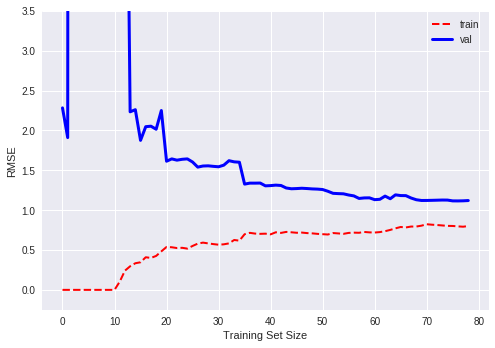

In [23]:
# Fitting a 10th degree polynomial
from sklearn.pipeline import Pipeline

poly_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])
plot_learning_curves(poly_regression, X, y)

The curves seem similar to the previous, but note two main things:
* The error is much lower
* There's a gap between the curves, which is common for overfitting models (i.e. model is performing better on training set). If the training set was larger, however, the two curves would be closer together

#### Bias/Variance Trade-off

A model's generalization error can be expressed as the sum of three very different errors

*Bias*

Part of the generalization that is wrong due to the assumptions, such as assuming that data is linear when it is quadratic

*Variance*

Error due to the model's sensitivity to small variations in the training data. A model with many degrees of freedom (e.g. high degree polynomial) is likely to have high variance and thus overfit the training data

*Irreducible Error*

Error that is due to the noisyness of the data. Only way to reduce it is to clean the data (fix data source, detect and remove outliers)

Increasing a model's complexity typically increases it's variance and reduces bias. Conversely reducing complexity increases bias and reduces variance, hence bias-variance trade-off.

## Regularized Linear Models

Regularizing a model is to constrain it. 

For polynomial model, we can regularize it by reducing the number of polynomial degrees.

For linear models, regularization is achieved by constraining the weights of the model. We'll look at Rigde Regression, Lasso Regression and Elastic Net, each which apply a different way to constrain the weights.

### Ridge Regression

Also called *Tikhonov Regularization*, is a regularized version of linear regression. We add a term to the cost function and use a new cost function $J(\boldsymbol\theta)$:
$$ J(\boldsymbol\theta) = \text{MSE}(\boldsymbol\theta) + \alpha\frac{1}{2}\sum_{i=1}^{n}{\boldsymbol\theta_i^2}$$

Note that the bias term $\theta_0$ is not regularized. Another way to write the regularization in terms of the feature weights $\textbf{w}$ is $\frac{1}{2}(||\textbf{w}||_2)^2$ Where $||\textbf{w}||_2$ is the $l_2$ mean. For gradient descent, just add $\alpha\textbf{w}$ tot the MSE gradient vector.

This forces the algorithm to keep model weights as small as possible. **Note** that the regularization term should only be added during training, once the model is trained you want to use the unregularized performance measure to evaluate performance.

It is important to scale the data before performing Ridge Regression as it is sensitive to the scale of the input features.

$\alpha$ controls how much regularization to apply. If $\alpha=0$ then Ridge regression is just linear regression. If $\alpha$ is very large, then all weights end up close to zero, resulting in a flat line going through the mean.

(see plots on book for more detail) 

Ridge Regression can be computed by either solving the normal equation or using SGD, the pros and cons are the same. The Normal Equation for Ridge Regression is
$$ \hat{\boldsymbol\theta} = (\textbf{X}^\intercal\textbf{X} + \alpha\textbf{A})^{-1}\textbf{X}^\intercal \textbf{y} $$
Where $\textbf{A}$ is the $(n+1)\times(n+1)$ identity matrix with a 0 on the top left entry (corresponding to the bias term)

In [24]:
# Ridge Regression with sklearn using Cholesky factorization for the Normal Equation
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.4921896]])

In [25]:
# Ridge Regression using SGD
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.45438372])

### Lasso Regression

*Least Absolute Shrinkage and Selection Operator Regression* (or Lasso Regression) adds a regularization factor using the $l_1$ norm. The cost function is
$$ J(\boldsymbol\theta) = \text{MSE}(\boldsymbol\theta) + \alpha\sum_{i=1}^n{|\theta_i|} $$

(See plots on book regarding various values of $\alpha$ for lasso)

Lasso tends to eliminate the weights of non-important features. In other words, it automatically performs feature selection and outputs a *sparse model*

Since the $l_1$ norm is not differentiable, we need another approach for Gradient Descent. Instead, we use a *subgradient vector* when any $\theta_i=0$
$$ g(\boldsymbol\theta, J) = \nabla_{\boldsymbol\theta}\text{MSE}(\boldsymbol\theta) + \alpha\times\text{sign}(\boldsymbol\theta)$$
Where 
$$\text{sign}(\theta_i) = \begin{cases} -1 & \text{if } \theta_i <0 \\ 0 & \text{if } \theta_i=0 \\ +1 & \text{if } \theta_i >0\end{cases} $$

In [26]:
# sklearn lasso regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.43345829])

In [27]:
# Lass Regression using SGD
sgd_reg = SGDRegressor(penalty='l1')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.46568661])

### Elastic Net

Elastic net is a mix between Ridge and Lasso regression. We add both $l_1$ and $l_2$ terms with a factor $r$. When $r=0$ Elastic net is Ridge regression and when $r=1$ Elastic net is Lasso regression. Below the cost function

$$ J(\boldsymbol\theta) = \text{MSE}(\boldsymbol\theta) + r\cdot\alpha\sum_{i=1}^n{|\theta_i|} + \frac{1-r}{2}\sum_{i=1}^n{\theta_i^2}$$

#### Which one to choose?

In general, we want at least some regularization, so plain regression is not a good choice.

It is sensible to start with Ridge Regression. Use Lasso or Elastic Net regression if you suspect that only a few features are useful as they reduce the weights of the least useful features to zero.

In general Elastic Net is preferred to Lasso as the latter may behave erratically if the number of features is greater than the number of training instances or when several features are strongly correlated.

In [28]:
# Elastic net with sklearn
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5) # l1_ratio = r
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.4407165])

### Early Stopping

Another way to approach regularization during GD is to keep track of the RMSE as epochs pass. We train the model until error reaches a minimum and then stop. The error will start going up as the model starts overfitting the data. Below a simple implementation

In [29]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

# Prep data
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                      penalty=None, learning_rate='constant', eta0=5e-4)
minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

To visualise it

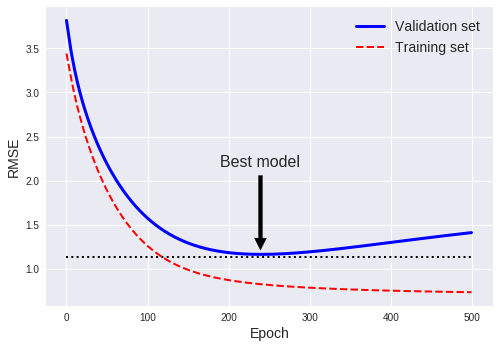

In [30]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

## Logistic Regression

Logistic Regression is similar to Linear Regression, the model calculates a weighted sum of the input features (plus bias term), but instead of outputting that result directly, it applies a *sigmoid function* that outputs a number between 0 and 1. The logistic regression estimated probability function is 

$$ \hat{p} = h_{\boldsymbol\theta}(\textbf{x}) = \sigma(\textbf{x}^{\intercal}\boldsymbol\theta) $$

Where 
$$ \sigma(t) = \frac{1}{1 + e^{-t}} $$
is the logistic function.

Once the model calculates the estimated probabilty $\hat{p}$, it makes a prediction $\hat{y}$ by using the following function

$$ \hat{y} = \begin{cases} 0 & \text{if } \hat{p} <0.5 \\ 1 & \text{if } \hat{p} \geq 0.5 \end{cases} $$

Note that $\sigma(t) < 0.5$ when $t<0$ and $\sigma(t) \geq 0.5$ when $t\geq 0$. So the output is 1 if $\textbf{x}^{\intercal}\boldsymbol\theta$ is positive and 0 if it is negative

Logistic regression is useful as it can be used as a binary classifier to predict if an instance belongs to a particular class

### Training and Cost function

The objective of training is to set the parameter vector $\theta$ so that the model estimates high probabilities for positive instances ($y=1$) and low probabilities for negative instances ($y=0$). The cost function used is

$$ c(\boldsymbol\theta) = \begin{cases} -\log(\hat{p}) & \text{if } y=1 \\ -\log(1-\hat{p}) & \text{if } y=0 \end{cases} $$

Let's see how these equations behave

/home/carlos/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/home/carlos/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


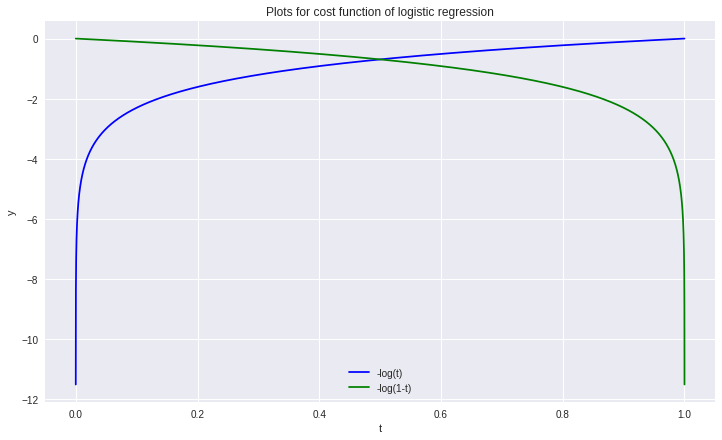

In [31]:
t = np.linspace(0, 1, 100000)
f1 = np.log(t)
f2 = np.log(1 - t)

fig, ax = plt.subplots(figsize=(12,7))
ax.plot(t, f1, 'b', label='-log(t)')
ax.plot(t, f2, 'g', label='-log(1-t)')
ax.legend()
ax.set_ylabel('y')
ax.set_xlabel('t')
ax.set_title("Plots for cost function of logistic regression")
plt.show()

From the plot above, when t approaches zero, $-log(t)$ gets very large, so if the model estimates a probability close to zero for a positive instance $(y=1)$ and it is also large if it estimates a probability close to 1 for a negative instance. 

Conversely $-log(t)$ is close to 0 when $t$ is close to 1, so the cost is close to 0 for an estimated probability close to 0 for a negative instance or close to 1 for a positive instance. Precisely what we want.

The function over the whole set is the average cost over all training instances. It can be written in a single expression called $log$ $loss$ 

$$ J(\boldsymbol\theta) = -\frac{1}{m}\sum_{i=1}^{m}\big[y^{(i)}log(\hat{p}^{(i)}) + (1 - y^{(i)})log(1- \hat{p}^{(i)}) \big]  $$

This equation has no closed form solution, however it is a convex function, meaning that Gradient Descent will find the global minimum (given enough time and not too large learning rate). The partial derivatives of the cost function are given as follows

$$ \frac{\partial}{\partial\theta_j}J(\boldsymbol\theta) = \frac{1}{m}\sum_{i=1}^{m}(\sigma(\boldsymbol\theta^{\intercal} \textbf{x}^{(i)}) - y^{(i)})x^{(i)}_j $$

### Decision Boundaries

Using Iris dataset to illustrate Logistic Regression. We'll build a classifier to detect the *Iris Virginica* type based on petal width only

In [32]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [33]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [34]:
X = iris['data'][:, 3:] # petal width
y = (iris['target'] == 2).astype(np.int) # 1 if Iris Virginica, else 0

In [35]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

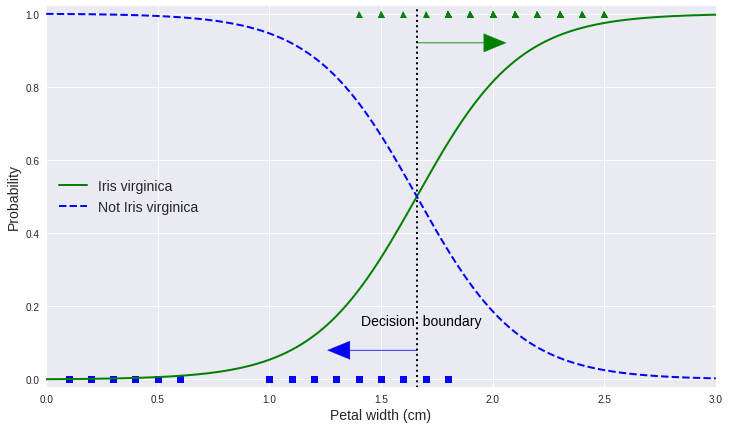

In [36]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(12, 7))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

Iris Virginica flowers (green triangles) have petal width varying from 1.4 to 2.5 cm, while other flowers have smaller petal width (0.1cm to 1.8cm). There is a bit of overlap. If we're presented with a new flower with petal width greater than 2cm, the classifier is highly confident it will be an iris virginica. Conversely if it has width less than 1cm it will be confident it is not an iris virginica. 

In between these ranges, teh classifier is unsure, but using the predict method of the classifier will return whichever class is most likely. Thus a decision boundary is formed around 1.6cm where both probabilities are equal to 50%. If the petal width is greater than 1.6cm the model outputs iris virginica, otherwise it outputs not iris virginica (even if it is not very confident).

In [37]:
log_reg.predict([[1.661], [1.660]])

array([1, 0])

The plot below, show the same dataset now trained on petal lenght and width. The dashed line represents the points where the model estimates 50% probability. Other lines show the other probabilities from 15% to 90%

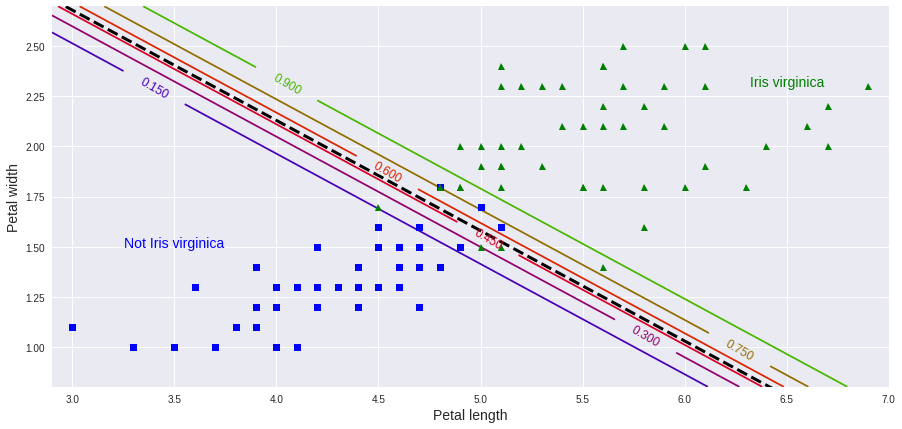

In [38]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(15, 7))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

Just like other linear models, we can regularize Logistic Regression using $l_1$ or $l_2$ penalties. sklearn uses $l2$ penalty by default.

*Note:* The hyperparameter controlling regularization of logistic regression is *C*, the inverse of $\alpha$. The higher the value of $C$, the *less* the model is regularized

## Softmax Regression

Softmax is a generalization of logistic regression, that supports *multiclass*, i.e. it supports variables with various categorical outputs without the need for combining multiple binary classifiers in OvR/OvO fashion. It is also called *Multinomial Logistic Regression*. 

It works as follows: given an instance $\textbf{x}$, we compute a score $s_k$ for each class $k$ then estimate the probability of each class by applying the *softmax function* to the scores. The score function $s_k$ is
$$ s_k(\textbf{x}) = \textbf{x}^{\intercal}\boldsymbol\theta^{(k)} $$
Note that each class has its own parameter vector $\theta^{(k)}$. All these vectors are typically stored in a *parameter matrix* $\Theta$

After the score for each class is computed for $\textbf{x}$ we apply the softmax function to calculate the probability that $\textbf{x}$ belongs to class $k$
$$ \hat{p}_k = \sigma(\textbf{s(x)})_k = \frac{\exp{s_k(\textbf{x})}}{\sum_{j=1}^{K}\exp{s_j(\textbf{x})}}$$
Where 
* K is the number of classes
* $\textbf{s(x)}$ is a vector containing the scores for each class for $\textbf{x}$
* $\sigma(\textbf{s(x)})_k$ is the estimated probability that the instance $\textbf{x}$ belongs to class $k$

The softmax classifier predicts the class with the highest estimated probability i.e.
$$ \hat{y} = \underset{x}{\text{argmax }} \sigma(\textbf{s(x)})_k $$
Returns the class that maximizes the estimated probability.

Training Softmax, means we want the model to estimate a high probability for the target class. Softmax uses the *Cross Entropy* cost function given by 
$$ J(\boldsymbol\Theta) = -\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{K}{y_k^{(i)}}\log(\hat{p}_k^{(i)})$$
Where
 * $y_k^{(i)}$ is the target probability the ith instance belongs to class $k$. In general this is 1 or zero, depending on whether the instances belogs to the class or not.

This function penalizes the model when it estimates a low probability for a target class. Note also that if $K=2$ the cross entropy cost function is equivalent to the Logistic Regression cost function

Excellent explanation of Entropy and Cross Entropy: https://homl.info/xentropy

The gradient is given by
$$\nabla_{\boldsymbol\theta^{(k)}}J(\boldsymbol\Theta) = \frac{1}{m}\sum_{i=1}^{m}(\hat{p}_k^{(i)} - y_k^{(i)})\textbf{x}^{(i)} $$

ScikitLearn uses OvR by default for multinomial problems. We can switch to to Softmax Regression by setting the multi_class parameter and providing a solver that supports it such as lbfgs (which uses $l_2$ regularization)

In [39]:
X = iris['data'][:, (2,3)] # petal length and width
y = iris['target']

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
# Test prediction on an iris with petal length=5, petal width=2
print(f'Prediction class: {softmax_reg.predict([[5, 2]])}')
print(f'Probabilities: {softmax_reg.predict_proba([[5, 2]])}')
print(f'Class name: {iris["target_names"][2]}')

Prediction class: [2]
Probabilities: [[6.38014896e-07 5.74929995e-02 9.42506362e-01]]
Class name: virginica


# Exercises
Solved on pen + paper

### Exercise 12
Implement Batch Gradient Descent with early stopping using softmax regression.

In [138]:
from sklearn.model_selection import train_test_split

In [174]:
def softmax_batch_gd(X, y, n_epochs=50, eta=0.01):
    def score_class(xi, theta):
        """ Score for instance i, class k

        :param xi: Training instance i
        :param theta: Weights for class k
        """
        return np.exp(xi.T.dot(theta))

    def softmax_k(xi, param_matrix, k, num_classes):
        """ Calculates softmax function value for instance i, class k
        
        :param xi: Training instance i
        :param_matrix: Matrix containing weight vectors theta for each class k
        :param k: Class k
        :param num_classes: Total number of classes possible
        """
        return (score_class(xi, param_matrix[k]) / 
                sum(score_class(xi, param_matrix[j]) for j in range(num_classes)))

    def xentropy_grad(X, y, param_matrix, k, num_classes):
        """ Calculates cross-entropy gradient for each instance in X, for class k
        
        :param X: Training set features
        :param y: Training set targets
        :param_matrix: Matrix containing weight vectors theta for each class k
        :param k: Class k
        :param num_classes: Total number of classes possible
        """
        error_sum = sum(
            (softmax_k(xi, param_matrix, k, num_classes) - yi) * xi 
            for xi, yi in zip(X, y)
        ) 
        return error_sum/len(X)
    
    def train(X, y, param_matrix, num_classes):
        """ Calculates new param_matrix values """
        gradients = np.vstack([
            xentropy_grad(X, y, param_matrix, k, num_classes)
            for k in range(num_classes)
        ])
        return param_matrix - eta*gradients
    
    def score_class_matrix(xi, param_matrix):
        """ Returns class with highest softmax score for instance xi

        :param xi: Prediction instance i
        :param param_matrix: Matrix containing feature weights
        """
        return np.argmax([theta.T.dot(xi) for theta in param_matrix])
    
    def predict(X, param_matrix):
        """ Returns an array with predicted classes for each instance of X
        
        :param X: Data to be predicted
        :param_matrix: Matrix containing feature weights for each class
        """
        return np.array([score_class_matrix(xi, param_matrix) for xi in X])
    
    num_classes = len(np.unique(y))
    num_feats = X.shape[1]
    param_matrix = np.random.randn(num_classes, num_feats)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    train_errors, val_errors = [], []
    minimum_val_error = float('inf')
    
    for epoch in range(n_epochs):
        param_matrix = train(X_train, y_train, param_matrix, num_classes)
        y_train_predict = predict(X_train, param_matrix)
        y_test_predict = predict(X_test, param_matrix)
        
        train_errors.append(mean_squared_error(y_train, y_train_predict))
        val_error = mean_squared_error(y_val, y_val_predict)
        val_errors.append(val_error)
        if val_error < minimum_val_error:
            minimum_val_error = val_error
            best_epoch = epoch
            best_model = param_matrix
    
    return best_model

In [183]:
def soft_predict(X, model):
    """ Returns an array with predicted classes for each instance of X

    :param X: Data to be predicted
    :param_matrix: Matrix containing feature weights for each class
    """
    def score_class_matrix(xi, param_matrix):
        """ Returns class with highest softmax score for instance xi

        :param xi: Prediction instance i
        :param param_matrix: Matrix containing feature weights
        """
        return np.argmax([theta.T.dot(xi) for theta in param_matrix])
    
    return np.array([score_class_matrix(xi, model) for xi in X])

In [193]:
best_softmax = softmax_batch_gd(X, y)

In [194]:
soft_predict(X, best_softmax)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [195]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

To Do: Investigate what's happening in the above. Looks like the model is predicting only one class!